In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

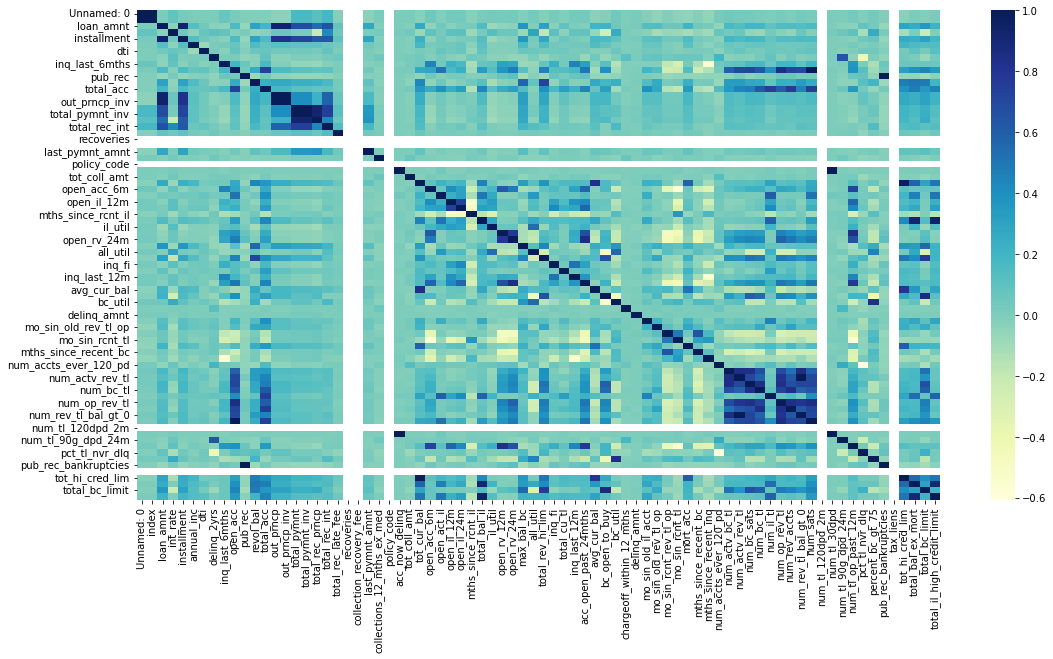

In [2]:
train_df = pd.read_csv(Path('Resources/2019loans.csv'))
test_df = pd.read_csv(Path('Resources/2020Q1loans.csv'))
#ax = sns.heatmap(train_df.corr(), cmap='Blues')
# plotting the heatmap
plt.figure(figsize=(18,9))

hm = sns.heatmap(data=train_df.corr(),
                cmap='YlGnBu')
plt.show()


In [3]:
train_df = pd.get_dummies (train_df)
#train_df = train_df.dropna(axis='columns', how='all')
#train_df = train_df.drop(columns=['Unnamed: 0','tax_liens'])
train_df

,Unnamed: 0,index,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,loan_status_low_risk,pymnt_plan_n,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,hardship_flag_N,hardship_flag_Y,debt_settlement_flag_N,debt_settlement_flag_Y
0,57107,57107,13375.0,0.1797,483.34,223000.0,29.99,0.0,0.0,15.0,...,1,1,0,1,1,0,1,0,1,0
1,141451,141451,21000.0,0.1308,478.68,123000.0,11.26,2.0,0.0,16.0,...,1,1,0,1,1,0,1,0,1,0
2,321143,321143,20000.0,0.1240,448.95,197000.0,11.28,0.0,0.0,12.0,...,1,1,0,1,1,0,1,0,1,0
3,11778,11778,3000.0,0.1240,100.22,45000.0,18.08,0.0,0.0,12.0,...,1,1,0,1,1,0,1,0,1,0
4,169382,169382,30000.0,0.1612,1056.49,133000.0,27.77,0.0,2.0,13.0,...,1,1,0,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12175,354912,354912,19975.0,0.2565,801.09,28000.0,28.42,0.0,0.0,15.0,...,0,1,0,1,1,0,1,0,1,0
12176,354944,354944,15000.0,0.1774,540.34,50000.0,23.43,4.0,0.0,16.0,...,0,1,0,1,1,0,1,0,1,0
12177,354973,354973,3600.0,0.1862,131.28,60000.0,28.80,0.0,1.0,14.0,...,0,1,0,1,1,0,1,0,1,0
12178,355002,355002,15000.0,0.0881,475.68,62000.0,11.44,0.0,0.0,5.0,...,0,1,0,1,0,1,1,0,1,0


In [4]:
test_df = pd.get_dummies (test_df)
#train_df = train_df.dropna(axis='columns', how='all')
#train_df = train_df.drop(columns=['Unnamed: 0','tax_liens'])
test_df

,Unnamed: 0,index,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,loan_status_high_risk,loan_status_low_risk,pymnt_plan_n,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,hardship_flag_N,hardship_flag_Y,debt_settlement_flag_N
0,67991,67991,40000.0,0.0819,814.70,140000.0,19.75,0.0,1.0,18.0,...,0,1,1,0,1,1,0,1,0,1
1,25429,25429,6000.0,0.1524,208.70,55000.0,11.52,2.0,0.0,8.0,...,0,1,1,0,1,1,0,1,0,1
2,38496,38496,3600.0,0.1695,128.27,42000.0,6.74,0.0,0.0,6.0,...,0,1,1,0,1,1,0,1,0,1
3,19667,19667,20000.0,0.1524,478.33,100000.0,12.13,0.0,2.0,7.0,...,0,1,1,0,1,1,0,1,0,1
4,37505,37505,3600.0,0.1240,120.27,50000.0,16.08,0.0,3.0,6.0,...,0,1,1,0,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4697,77282,77282,30000.0,0.1240,673.42,140480.0,15.74,0.0,0.0,20.0,...,1,0,1,1,0,1,0,1,0,1
4698,77291,77291,24000.0,0.0756,747.22,50000.0,26.81,0.0,0.0,9.0,...,1,0,1,0,1,1,0,1,0,1
4699,77292,77292,10000.0,0.2305,387.36,33000.0,38.51,0.0,2.0,7.0,...,1,0,1,1,0,1,0,1,0,1
4700,77297,77297,8000.0,0.1862,205.86,38000.0,16.36,0.0,1.0,8.0,...,1,0,1,0,1,1,0,1,0,1


In [5]:
for col in train_df.columns:
    if col not in test_df.columns:
        test_df[col] = 0
        
print(len(test_df.columns))
print(len(train_df.columns))

96
96


In [6]:
for col in train_df.columns:
    if 'loan_status'in col:
        print(col)

loan_status_high_risk
loan_status_low_risk


In [7]:
#Make x and y train test

In [8]:
# Convert categorical data to numeric and separate target feature for testing data
y_train = train_df['loan_status_high_risk']
X_train = train_df.drop(columns= ['loan_status_high_risk','loan_status_low_risk'])

In [9]:
y_test = test_df['loan_status_high_risk']
X_test = test_df.drop(columns= ['loan_status_high_risk','loan_status_low_risk'])

In [10]:
       # add missing dummy variables to testing set

In [11]:
# Train the Logistic Regression model on the unscaled data and print the model score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
lrc = LogisticRegression()
lrc.fit(X_train, y_train)
lrc.score(X_test, y_test)


C:\Users\vbari\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.5253083794130158

In [12]:
# Train a Random Forest Classifier model and print the model score
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)


0.5893236920459379

In [18]:
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler().fit(X_train)
X_trainscaled= scaler.transform(X_train)
X_testscaled= scaler.transform(X_test)
print(f"Training Data Score: {rfc.score(X_trainscaled, y_train)}")
print(f"Testing Data Score: {rfc.score(X_testscaled, y_test)}")


Training Data Score: 1.0
Testing Data Score: 0.5827307528711186


In [14]:
# Train the Logistic Regression model on the Scaled data and print the model score
# Train the Logistic Regression model on the Unscaled data and print the model score

lrc.fit(X_trainscaled, y_train)
print(f"Training Data Score: {lrc.score(X_trainscaled, y_train)}")
print(f"Testing Data Score: {lrc.score(X_testscaled, y_test)}")


Training Data Score: 0.7130541871921182
Testing Data Score: 0.7201190982560612


C:\Users\vbari\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
# Train a Random Forest Classifier model on the scaled data and print the model score
rfc.fit(X_trainscaled, y_train)
print(f"Training Data Score: {rfc.score(X_trainscaled, y_train)}")
print(f"Testing Data Score: {rfc.score(X_testscaled, y_test)}")

Training Data Score: 1.0
Testing Data Score: 0.5827307528711186


### Prediction commentary:
My prediction was for RFC to show better than LRC, before and after the scaling.  RFC is typically a better tool when non-linear data is present.  The initial score was .589 while the equivalent Logistic Regression score was .525, a difference of .064. I expected scaling to improve both scores but still expected a better result that LRC.  Instead, the LRC and the RFC were no different.